In [49]:
%load_ext autoreload
%autoreload 2

import plots
import runner
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Base Model of Single EI Population

Characteristics of base model
* rhythm with 30-40 Hz frequency -> gamma
* relatively synchronized, excitatory group is slightly desynchronized
* driven by PING rhythm, inhibition blocks excitation, once excitatory group fires inihibitory group follows immediately, and so on...
* low random background noise (mean voltage of 4.0 mV, $\sigma = .7$, $\tau = 1$)

This base model should show a PING mechanism. Activity should lie around 40 Hz and upwards, thus displaying gamma band activity.
Excitatory and inhibitory groups should be strongly synchronized.

No hyperbursts, no anomalies.

In [50]:
params = {
 "J_itoi": 3.0,
 "J_etoe": 0.1,
}

model = runner.run(modified_params=params, file_name="base")

Initializing net ...
initialization time: 0.18510913848876953s
------------------ running network!
runtime: 7.9


In [51]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("base")

Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x136f270f0>)

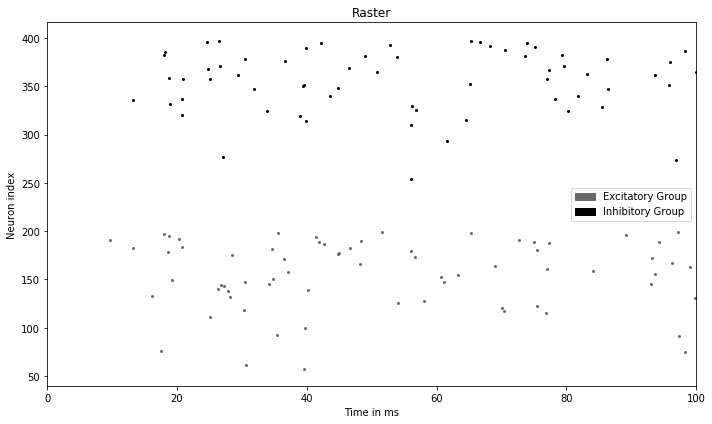

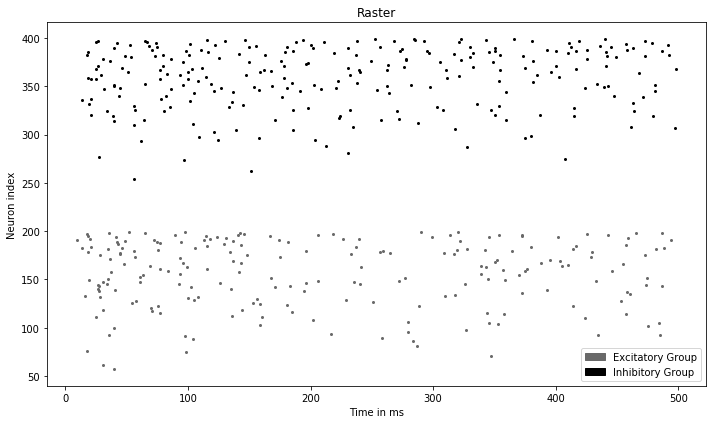

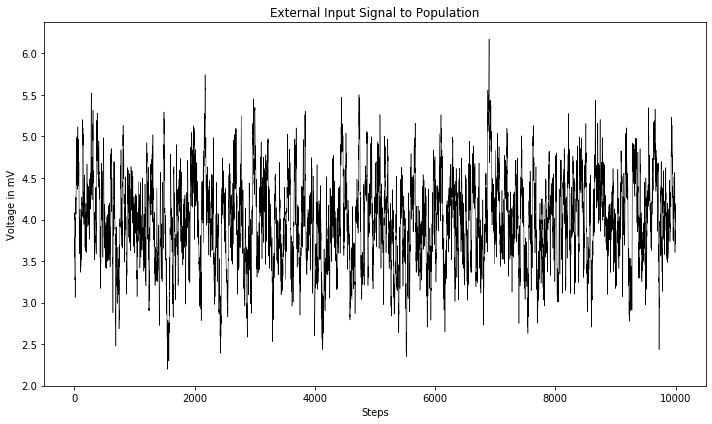

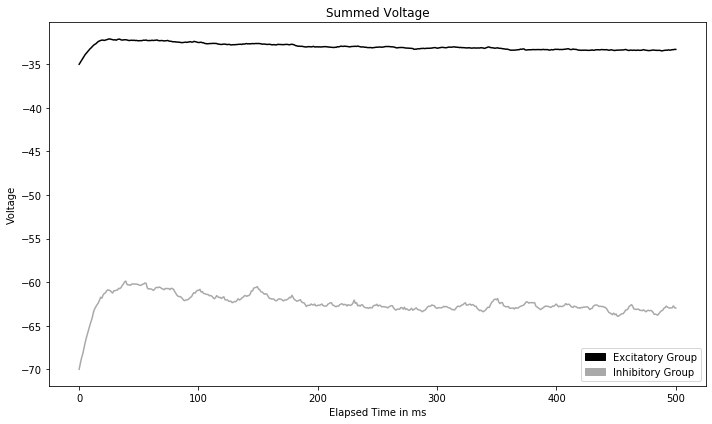

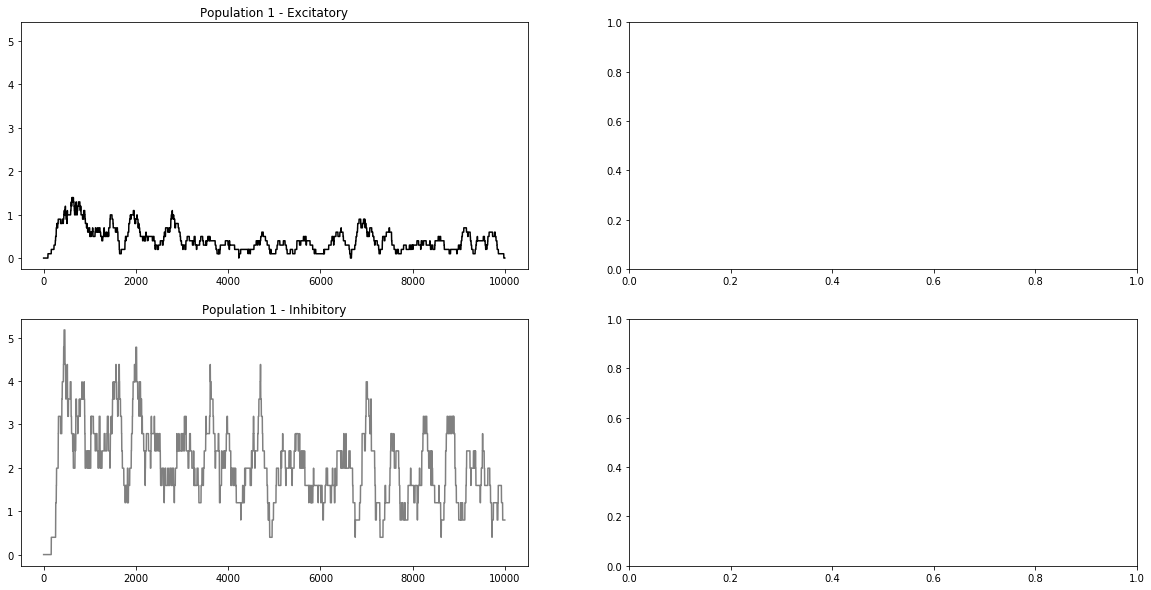

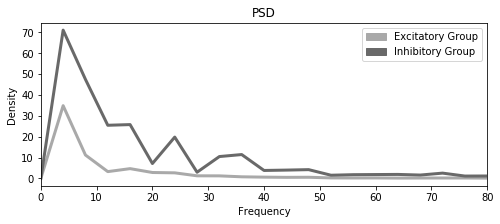

In [52]:
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(params=model["params"])
plots.lfp(model=model)
plots.population_rates(model)
plots.psd(model, title="PSD")